In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import time
import math

%load_ext Cython

In [2]:
#v=list(os.walk('./zdjs/light_set'))
v=list(os.walk('./zdjs/Trivial'))

f=[0]*200
j=0
for i in range(0, len(v)):
    for x in (v[i][2]):
        f[j]=cv.imread(v[i][0]+'/'+x, cv.IMREAD_GRAYSCALE)
        j+=1
        
def grave(img, biw=0):
    fig, ax=plt.subplots(1,1,figsize=(22,22))
    if (biw==1):
        ax.imshow(img, cmap='Greys',  interpolation='nearest')
    else:
        ax.imshow(img)
    plt.show()
    return

def decorate(i):
    print()
    print('#'*30+'   '+str(i)+'   '+'#'*30)
    print()


##############################   0   ##############################



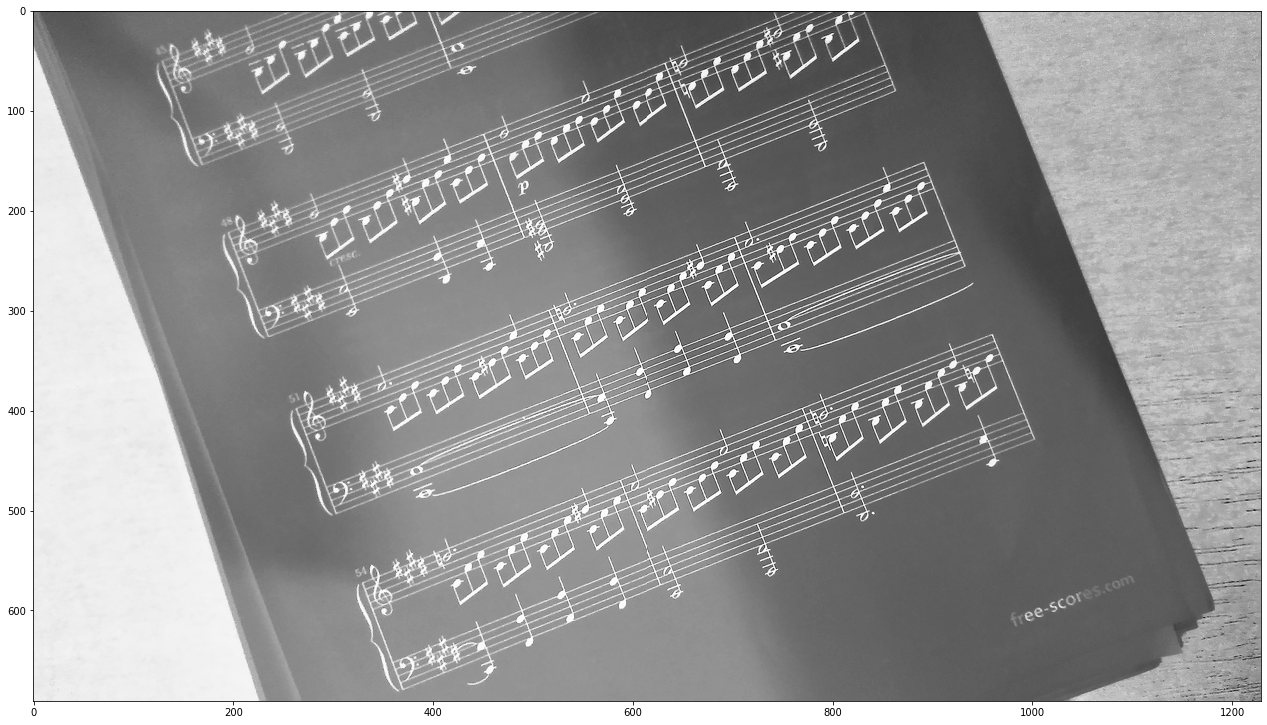

691 1229 0.0 0.0


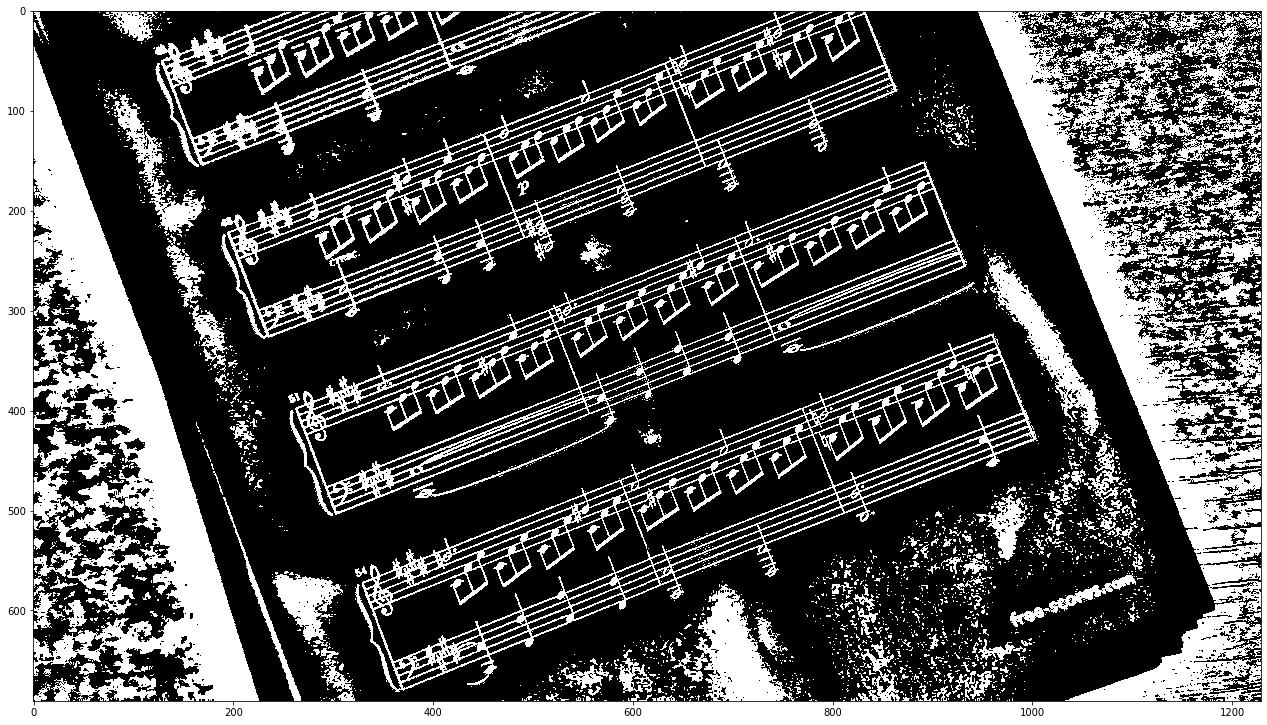

kolejno: wysokość wiersza, grubość wiersza, kolumna od lewej: początek, koniec
(0.0008006405124099279, 16.0, 0, 1249)
(697.1421052631579, 3.8421052631578947, 597, 785)
(695.3755004003202, 1.6400000000000001, 0, 1249)
liczba liń z pięcioliń: 3 (jak podzielna przez 5 to pewnie się zgadza)


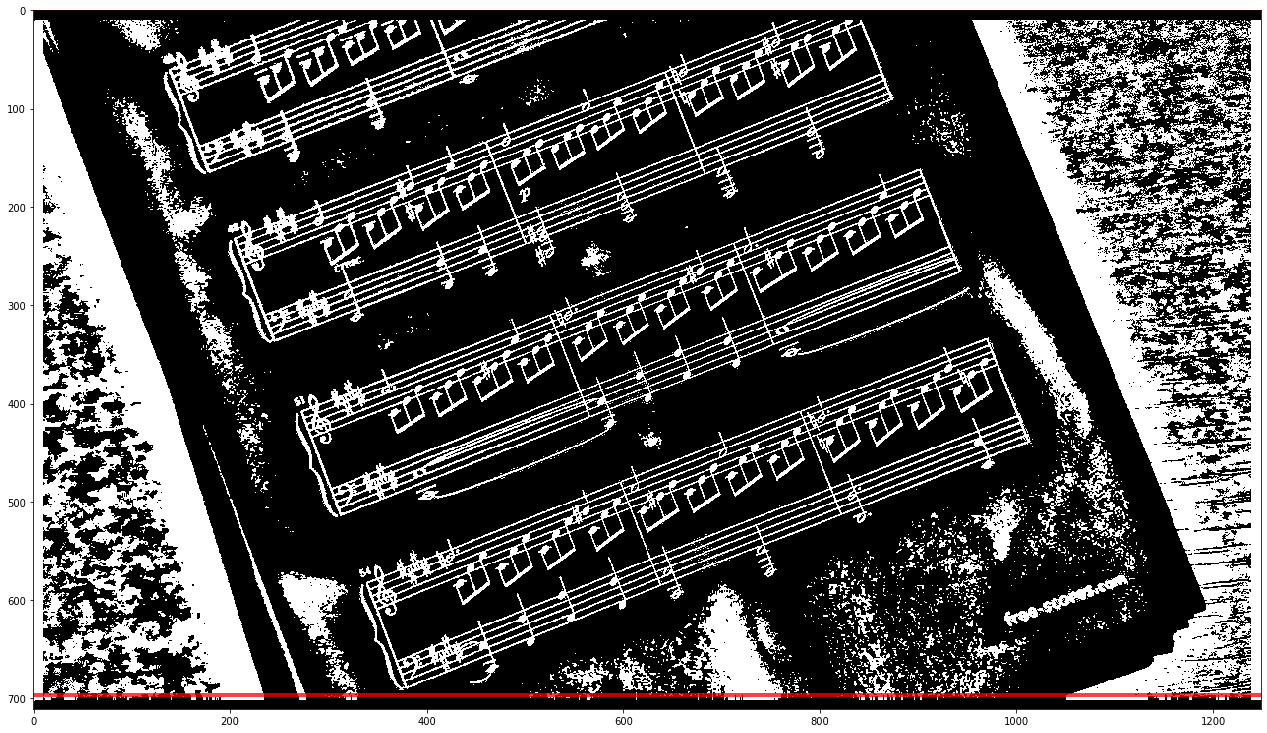

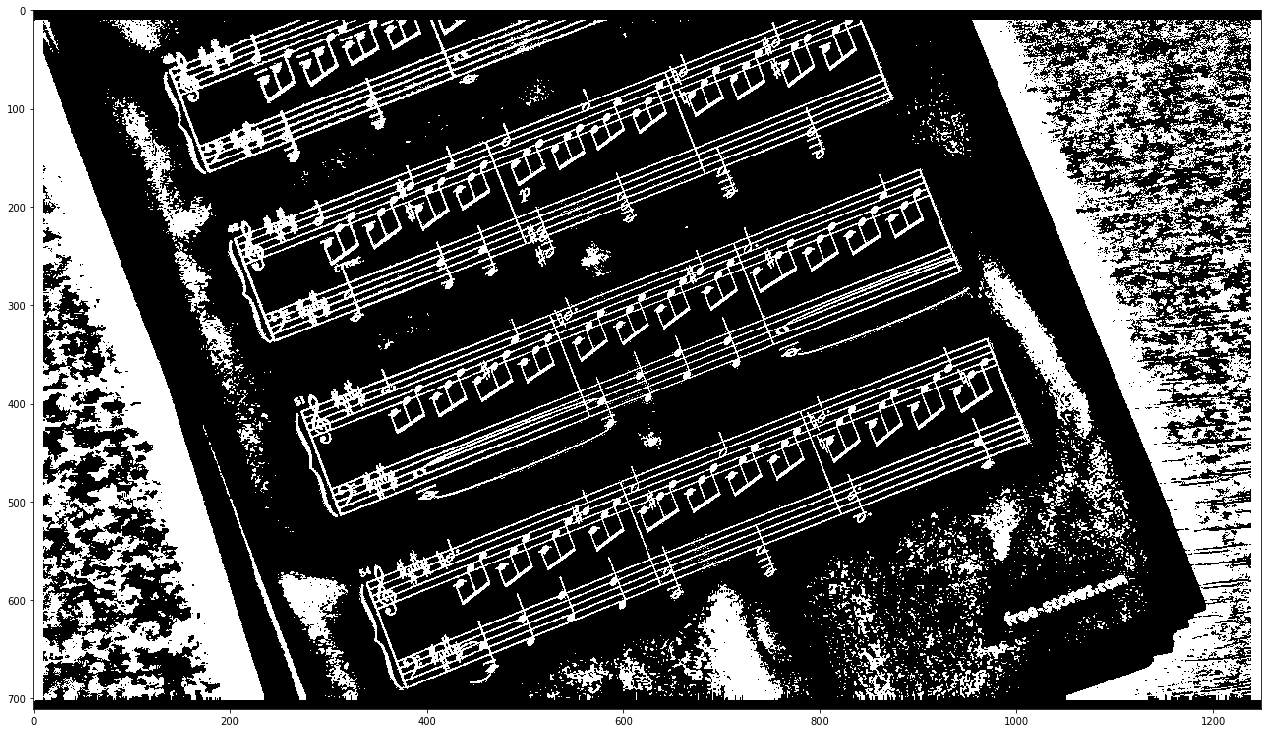


##############################   1   ##############################



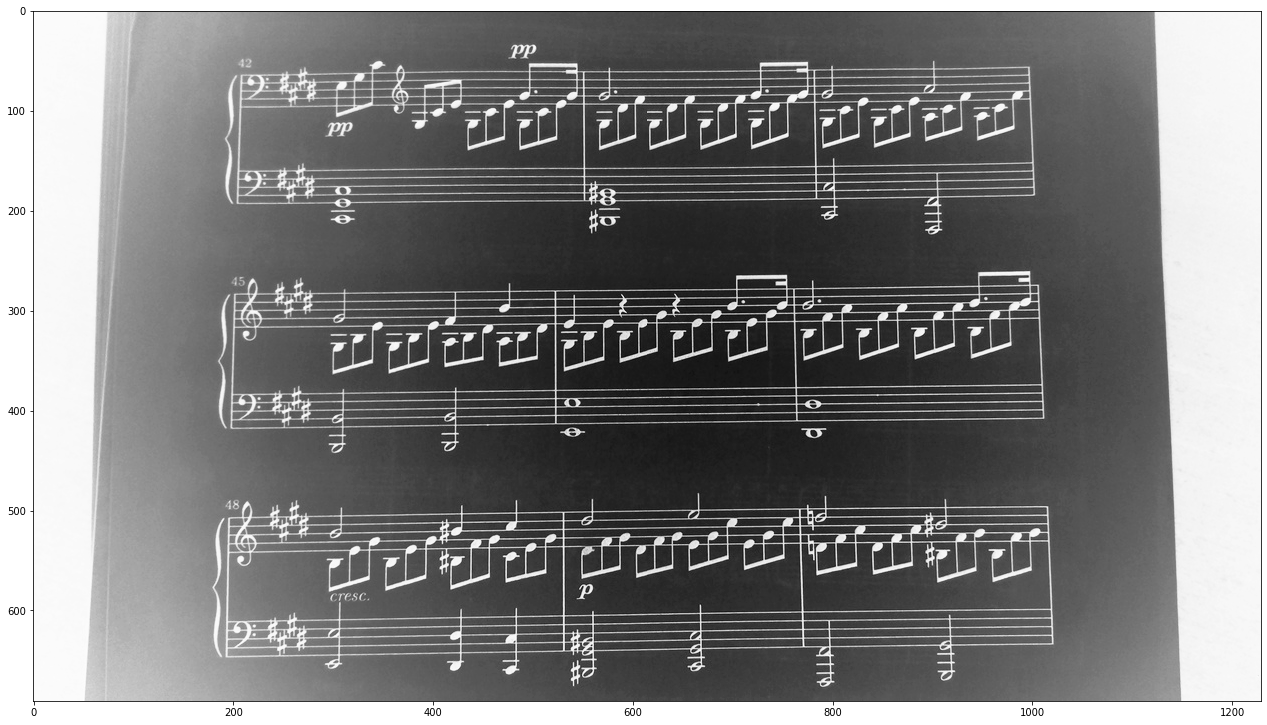

691 1229 0.0 0.0


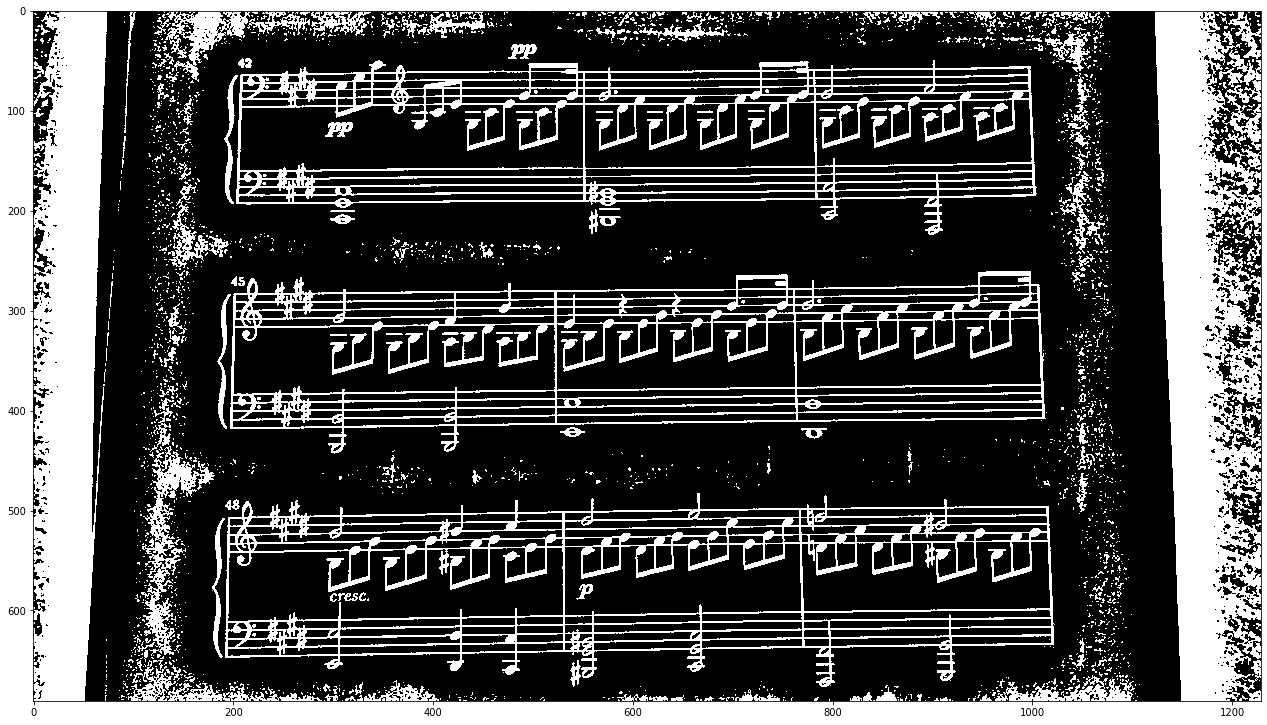

kolejno: wysokość wiersza, grubość wiersza, kolumna od lewej: początek, koniec
(0.0008006405124099279, 16.0, 0, 1249)
(10.226495726495726, 0.17647058823529393, 545, 777)
(32.609375, 1.4967320261437909, 543, 733)
(71.03435582822085, 1.0460122699386503, 203, 1016)
(79.04517704517704, 1.1798780487804876, 199, 1016)
(87.08526187576126, 1.1097560975609757, 197, 1016)
(95.35644768856447, 1.599695585996956, 196, 1016)
(103.35644768856447, 1.8949771689497719, 197, 1017)
(167.6348246674728, 0.9682779456193353, 195, 1020)
(175.76328502415458, 0.9894419306184012, 194, 1020)
(183.78063725490196, 1.0367534456355285, 206, 1020)
(192.06875753920386, 1.069277108433735, 195, 1022)
(199.95030303030302, 1.043939393939394, 198, 1021)
(289.95427196149217, 1.0, 196, 1025)
(298.2502994011976, 0.9625748502994012, 192, 1025)
(306.19354838709677, 1.426865671641791, 190, 1025)
(314.43249701314215, 1.508955223880597, 190, 1025)
(322.66825775656326, 1.6110283159463488, 190, 1026)
(389.3238434163701, 1.0, 188, 1029

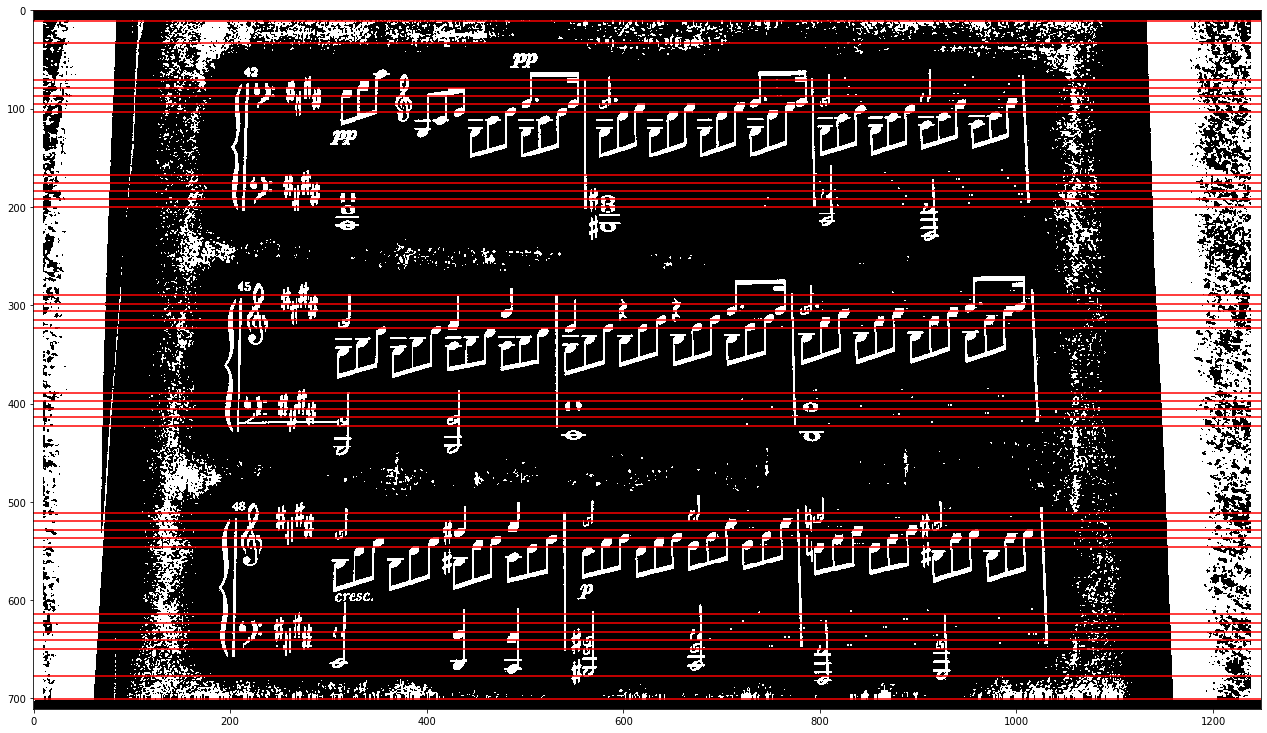

KeyboardInterrupt: 

In [3]:
def binarization(bwimg):
    kernel=[0]*10
    #kernele do grafiki
    kernel[1]=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
    kernel[2]=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
    kernel[3]=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
    kernel[4]=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
    kernel[5]=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
    kernel[6]=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
    dm=(7,7)
    kernel[7]=np.asarray([[1 for j in range(dm[0])] for i in range(dm[1])])
    kernel[8]=np.asarray([[0, -1, 0], [-1,5,-1], [0, -1, 0]])
    
    mg2=cv.filter2D(bwimg, -1, kernel[4])
    im3=cv.filter2D(mg2, -1, kernel[1])
    im4=cv.filter2D(im3, -1, kernel[7])
    
    return cv.adaptiveThreshold(bwimg, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 145, 1)

def blackening(bwimg, path):
    s, t, gr=0, 0, 0
    st=[0]*20
    dep=[0]*len(path)
    end1=[0]*len(path)
    end2=[0]*len(path)
    
    for i in range(len(path)):
        s1v=bwimg[path[i][0]-10:path[i][0]+10, path[i][1]] if (path[i][0]+10<bwimg.shape[0] and path[i][0]-10>=0) else 0
        for ij in range(0, -10, -1):
            a, b=path[i][0]+ij, path[i][1]
            if (bwimg[a,b]==255):
                break
        end1[i]=ij
        
        for ij in range(1, 10, 1):
            a, b=path[i][0]+ij, path[i][1]
            
            if (bwimg[a,b]==255):
                break
        end2[i]=ij
        
        dep[i]=end2[i]-end1[i]
    ld=len(dep)
    dep2=sorted(dep)
    small=dep2[math.floor(0.1*ld)]
    large=dep2[math.floor(0.9*ld)]
    
    dep2=dep2[math.floor(0.1*ld):math.floor(0.9*ld)]
    grub=sum(dep2)/len(dep2)-2
    
    midian=[0]*len(path)
    cur=0
    last=0
    midian[0]=path[0][0]
    for i in range(1, len(path)):
        if (dep[i]>grub+1):
            cur+=1
            continue
        else:
            midian[i]=path[i][0]+(end2[i]+end1[i])//2
            while (cur>0):
                p=path[i][0]-cur
                midian[i-cur]=midian[i] if (cur<p-last) else midian[last]
                tv=midian[i-cur]
                jj=1
                while (bwimg[tv, path[i-cur][1]]==255):
                    tv=tv+jj
                    jj=-jj-1*jj//abs(jj) 
                midian[i-cur]=tv
                cur-=1
            last=i
    
    dt0=math.ceil(grub)
    for i in range(len(path)):
        sc, t1, t2=0, 0, 0
        for jj in range(1, 10):
            if (bwimg[midian[i]+jj, path[i][1]]==255):
                break
        t1=jj
        for jj in range(0, -10, -1):
            if (bwimg[midian[i]+jj, path[i][1]]==255):
                break
        t2=jj
        sc=t1-t2
        
        if (sc<=dt0+3):
            for jj in range(t2, t1+1, 1):
                bwimg[midian[i]+jj, path[i][1]]=255
    
    return (sum(midian)/len(midian), grub)


def pathfinder(bwimg, fals, dead, yla, ylc, x):
    slain=0
    im=bwimg[yla:ylc+1,x]
    if (len(im)==2):
        print(yla, ylc, im, bwimg.shape)
    
    if (im[1]==255 and (im[0]==0 or im[2]==0)):
        fals+=1
        dead=0
    elif(im[1]==255):
        dead+=1
    else:
        fals, dead=0, 0
    
    if (fals==3):
        fals=0
        if (im[0]==0):
            yla, ylc=yla-1, ylc-1
        else:
            yla, ylc=yla+1, ylc+1
    if (dead==8):
        dead=0
        slain=1
    return(fals, dead, slain, yla, ylc)


def findlinez(bwimg, shp):
    skv=2
    solution=[]
    for kk in range(1, skv):
        y=1
        x1=(kk*bwimg.shape[1])//skv-2
        x2=(kk*bwimg.shape[1])//skv+2
        
        while (y<bwimg.shape[0]-1):
            vs=bwimg[y,x1:x2+1]
            if (0 in vs):
                xl=bwimg.shape[1]//2
                yla, ylc=y-1, y+1
                xr=xl

                pathway=[]
                fals, dead, slain=0, 0, 0
                while (xl>0):
                    fals, dead, slain, yla, ylc=pathfinder(bwimg, fals, dead, yla, ylc, xl)
                    pathway.append((yla+1, xl))
                    if (slain==1 or yla==-1 or ylc>=bwimg.shape[0]):
                        break
                    xl-=1

                fals, dead, slain=0, 0, 0
                yla, ylc=y-1, y+1
                pathway=pathway[::-1]


                while (xr<bwimg.shape[1]):
                    fals, dead, slain, yla, ylc=pathfinder(bwimg, fals, dead, yla, ylc, xr)
                    pathway.append((yla+1, xr))
                    if (slain==1 or yla==-1 or ylc>=bwimg.shape[0]):
                        break
                    xr+=1


                if (xr-xl>shp[1]*0.15):
                    sv, gr=blackening(bwimg, pathway)
                    solution.append((sv, gr, xl, xr))
            y+=1
    return solution

def rotate_image(img):
    minLineLength = 200
    maxLineGap = 10
    
    kern=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
    edges = cv.Canny(img,50,150,apertureSize = 3)
    
    lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

    cosa=[0]*len(lines)
    sina=[0]*len(lines)
    for i, iv in enumerate(lines):
        x1,y1,x2,y2=iv[0]
        if (y2<x1 or (x2==x1 and y2<y1)):
            f1, f2=x1, y1
            x1, y1=x2, y2
            x2, y2=x1, y1
        
        dx, dy=(x2-x1), (y2-y1)
        
        if (dx*dx+dy*dy>0):
            cosa[i]=dy/math.sqrt(dy*dy+dx*dx)
        else:
            cosa[i]=0
        #cv.line(img,(x1,y1),(x2,y2),(255,0,0),1)
    
    x=0
    blyat=[0]*210
    for i in range(len(cosa)):
        s=math.floor(cosa[i]*100)+100
        blyat[s]+=1
        if (blyat[s]>blyat[x]):
            x=s
    x=(x-100)/100
    #x2=np.mean(sina[i:n])
        
    angle=90-math.acos(x)*(180/math.pi)
    
    h, w = img.shape[:2]
    print(h, w, angle, x)
    image_center = (w/2, h/2)

    rotation_mat = cv.getRotationMatrix2D(image_center, angle, 1)

    radians = math.radians(angle)
    sin = math.sin(radians)
    cos = math.cos(radians)
    bound_w = int((h*abs(sin)) + (w*abs(cos)))
    bound_h = int((h*abs(cos)) + (w*abs(sin)))

    rotation_mat[0, 2] += ((bound_w / 2) - image_center[0])
    rotation_mat[1, 2] += ((bound_h / 2) - image_center[1])

    rotated_mat = cv.warpAffine(img, rotation_mat, (bound_w, bound_h), borderValue=255)
    return rotated_mat


for i in range(j):
    decorate(i)
    imgb=f[i].copy()
    grave(imgb, 1)
    shorig=imgb.shape
    
    ###BINARIZATION
    imv=binarization(imgb)
    #Rotacja po linii - czasem jeszcze nie działa
    img2=rotate_image(imv)
    grave(img2, 1)
    ss=np.zeros((img2.shape[0]+20, img2.shape[1]+20), dtype=str(img2.dtype))
    ss[10:-10,10:-10]=img2
    img2=ss.copy()
    
    ###DETECTION
    fig, ax=plt.subplots(1,1,figsize=(22,22))    
    sol=findlinez(img2, shorig)
    #sol - lista tupli - 1-wszy to uśrednione miejsce linii pięciolinii, 2-gi to grubość linii
    print('kolejno: wysokość wiersza, grubość wiersza, kolumna od lewej: początek, koniec')
    for x in sol:
        ax.axhline(x[0], color=(1,0,0))
        print(x)
    print('liczba liń z pięcioliń: {} (jak podzielna przez 5 to pewnie się zgadza)'.format(len(sol)))
    
    ax.imshow(img2, cmap='Greys',  interpolation='nearest')
    plt.show()
    
    grave(img2, 1)

In [20]:
#### 

In [ ]:
###Śmieci do recyklingu



##Bardzo efektywny do pdfów
kernel=[0]*10
#kernele do grafiki
kernel[1]=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
kernel[2]=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
kernel[3]=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
kernel[4]=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
kernel[5]=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
kernel[6]=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
dm=(7,7)
kernel[7]=np.asarray([[1 for j in range(dm[0])] for i in range(dm[1])])
kernel[8]=np.asarray([[0, -1, 0], [-1,5,-1], [0, -1, 0]])


for i in range(j):
    img=f[i].copy()
    grayscaled = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img2=cv.adaptiveThreshold(grayscaled, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 35, 1)
    grave(img2)
    grave(img)
    
    
    
    
#To idzie do lamusa
def detect_5(bwimg):
    cs=0
    jj=0
    bethon=[0]*1000
    x=0
    cdis=80
    v1, v2=10, cdis+10
    
    while (x<len(bwimg)-v1):
        svv=((255-bwimg[x:x+cdis,:])//255).astype('int32')
        svg=(sorted(np.sum(svv, axis=1), reverse=1))
        stv=zip(range(x, x+cdis), np.sum(svv, axis=1))
        stv=(sorted(stv, key=lambda x:x[1], reverse=1))
        
        svv2=((255-bwimg[x+v1:x+v2,:])//255).astype('int32')
        svg2=(sorted(np.sum(svv2, axis=1), reverse=1))
        stv2=zip(range(x+v1, x+v2), np.sum(svv2, axis=1))
        stv2=(sorted(stv2, key=lambda x:x[1], reverse=1))
        
        #Ta heura na razie jest koszmarna i nieuniwersalizowalna, choć idea pewnie dobra
        if (len(svg2)>5 and svg[4]==svg2[4] and svg[4]>0.6*bwimg.shape[1] and distinct(stv)==1):
            bethon[jj]=(x+5, x+cdis+5, stv2[:15])
            jj+=1
            x+=cdis
        else:
            x+=1
    return (bethon[:jj])


#Bierze imidż zarotowany równolegle do górnej krawędzi obrazka
def distinct(arr):
    st=sorted(arr, key=lambda x:x[0])
    j=0
    dist=1
    while (j<len(arr)):
        if (0.8*arr[0][1]>arr[j][1]):
            break
        if (j>0 and arr[j][0]-arr[j-1][0]>3):
            dist+=1
        j+=1
    return (1 if dist>=5 else 0)



    
    
    
    kgbo=np.zeros((img.shape[0], img.shape[1], 3), dtype='uint8')
    kgbo[:,:,0]=img
    kgbo[:,:,1]=img
    kgbo[:,:,2]=img
        
    for i, iv in enumerate(lines):
        x1,y1,x2,y2=iv[0]
        dx, dy=(x2-x1), (y2-y1)

        cosa[i]=abs(dy)/math.sqrt(dy*dy+dx*dx)    
        cv.line(kgbo,(x1,y1),(x2,y2),(255,0,0),1)
        
    grave(kgbo)
    
    """
            for i,x in enumerate(pathway):
                if (i==0):
                    continue
                if (bwimg[pathway[i][0],pathway[i][1]]==255):
                    if (bwimg[pathway[i-1][0],pathway[i][1]]==0):
                        pathway[i][0]=pathway[i-1][0]
                    else:
                        tv=pathway[i][0]
                        while (bwimg[tv, pathway[i][1]]==255):
                            tv=tv+jj
                            jj=-jj-1*jj//abs(jj)                             
                        cur-=1
            """